# Persiapan dan Analisis Data

### Import Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1KhHuJrSxyE_tnXKCR2QXqwvdGsCC-ur2/export?format=csv')

In [4]:
df.head()

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [5]:
df.drop(['Class'],axis=1,inplace=True)

In [6]:
df.shape[0]

5656

In [7]:
df = df.head(100)

In [8]:
print("test")

test


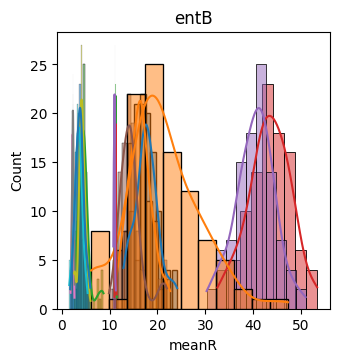

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(df, 1):
    plt.subplot(3, 5, 1)  # 3 baris dan 5 kolom
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

### Informasi Statistik Dasar

In [10]:
statistika_deskriptif = pd.DataFrame({
    'Mean': df.mean(),
    'Standard Deviation': df.std(),
    'Minimum': df.min(),
    'Maximum': df.max(),
    'Range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Median': df.quantile(0.5),
    'Q3': df.quantile(0.75),
})

display(statistika_deskriptif)

,Mean,Standard Deviation,Minimum,Maximum,Range,Q1,Median,Q3
meanR,17.722881,2.510675,12.901635,24.107420,11.205785,16.367019,17.536110,19.121724
meanG,16.322325,2.393191,11.254068,22.679270,11.425201,14.554237,16.237434,17.627935
meanB,4.682180,1.249190,2.624307,8.705452,6.081145,3.960729,4.516537,4.996776
stdR,43.373969,4.455788,32.532050,53.402409,20.870359,40.785171,43.586245,46.472045
stdG,40.423233,4.032435,30.273993,51.006337,20.732344,37.672380,40.797900,42.783851
stdB,14.461236,2.484368,9.853244,21.944262,12.091018,12.904793,14.218203,15.148656
skewR,2.226092,0.169740,1.792007,2.629571,0.837564,2.130191,2.243317,2.324003
skewG,2.290103,0.177073,1.865781,2.698518,0.832737,2.185866,2.295454,2.403263
skewB,4.173880,0.684012,2.573146,6.005699,3.432553,3.756776,4.194625,4.601940
kurR,3.431172,0.810709,1.549240,5.384343,3.835103,2.890078,3.438765,3.872692


### Missing Value

In [11]:
df.isna().sum()

meanR    0
meanG    0
meanB    0
stdR     0
stdG     0
stdB     0
skewR    0
skewG    0
skewB    0
kurR     0
kurG     0
kurB     0
entR     0
entG     0
entB     0
dtype: int64

### Distribusi Data

In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'df' is your DataFrame containing the dataset

# # Create histograms for all features in 'df'
# df.hist(figsize=(12, 10))  # Adjust figure size as needed
# plt.suptitle('Distribusi Fitur Dataset', fontsize=16)
# plt.tight_layout()
# plt.show()

### Mengidentifikasi Outlier

In [13]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# To find outliers for all columns:
for column in df.columns:
    outliers = find_outliers_iqr(df, column)
    outliers_sum = outliers.shape[0]
    if outliers.shape[0] > 0:  # Check if there are any outliers
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanR: 4
Outliers in meanG: 2
Outliers in meanB: 9
Outliers in stdG: 1
Outliers in stdB: 8
Outliers in skewR: 3
Outliers in skewB: 1
Outliers in kurR: 1
Outliers in kurB: 2
Outliers in entG: 1


In [14]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

def find_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

# To find the number of outliers for all columns:
for column in df.columns:
    outliers = find_outliers_zscore(df, column)
    outliers_sum = outliers.shape[0]  # Get the number of outliers
    if outliers_sum > 0:
        print(f"Outliers in {column}: {outliers_sum}")

Outliers in meanB: 3
Outliers in stdB: 1
Outliers in kurB: 1


# Preprocessing Data

### Normalisasi (min max)

In [15]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df)
# df = pd.DataFrame(df_scaled, columns=df.columns)

In [16]:
# df.hist(figsize=(12, 10))  # Adjust figure size as needed
# plt.suptitle('Distribusi Fitur Dataset Setelah Normalisasi', fontsize=16)
# plt.tight_layout()
# plt.show()

# Model

In [17]:
def SOM(train, w, cluster, R, max_epoch, lr, R_change):
  d = []
  closest_neighbors = []
  w_out = []

  for i in range(max_epoch):
    for j in range(len(train)):
      data = train[j]
      d_in = []
      w_to_update = []

      for k in range(len(w)):
         d_in.append(np.sum(np.multiply(data, w[k])))

      
      
      d_out_indices = np.argsort(d_in)
      closest_neighbor_index = d_out_indices[0]
      closest_neighbors.append(closest_neighbor_index)
      
      d.append(np.copy(d_in[d_out_indices[0]]))
      
      w_to_update = d_out_indices[:R + 1]

      for l in w_to_update :
        dw = (np.multiply(lr,(np.subtract(data, w[l]))))
        w[l] = np.add(w[l], dw)
      w_out.append(np.copy(w))
    lr *= 0.5
    if((i+1)%R_change == 0):
      R = np.random.randint(0,cluster)

  return d, w, closest_neighbors, w_out

## Calculating Error

In [18]:
def quantization_error(train, w, closest_neighbors):
  total_error = 0
  for i, data in enumerate(train):
    bmu = w[closest_neighbors[i]]
    total_error += np.linalg.norm(data - bmu)
  return total_error / len(train)

def topographic_error(train, w, closest_neighbors):
  error_count = 0
  for i, data in enumerate(train):
    # Calculate distances to all neurons
    distances = [np.linalg.norm(data - weight) for weight in w]

    # Find BMU and second BMU
    sorted_indices = np.argsort(distances)
    closest_neighbors = sorted_indices[0]
    second_closest_neighbors = sorted_indices[1]

    # Check if second BMU is adjacent to BMU in the grid
    if abs(closest_neighbors - second_closest_neighbors) > 1:  # Simplified adjacency check
      error_count += 1

  return error_count / len(train)


def count_error(train, w, closest_neighbors):
  qe = quantization_error(train, w, closest_neighbors)
  te = topographic_error(train, w, closest_neighbors)
  return qe, te

# Tuning Hyperparameter

## Tuning Manual

In [19]:
size = df.shape[1]

def generate_random_parameters(size):
  cluster = np.random.randint(2, 10)
  w = np.random.rand(cluster, size)
  R = np.random.randint(0, cluster)
  lr = np.random.uniform(1e-10, 0.1)
  R_change = np.random.randint(1, 10)
  max_epoch = np.random.randint(10, 100)

  return cluster, w, R, lr, R_change, max_epoch

def tuning(iter):
  used_parameters = set()
  best_parameter = []
  best_min_error = [1e1000,0,0]

  for i in range(iter):
    while True:
      cluster, w, R, lr, R_change, max_epoch = generate_random_parameters(size)

      param_tuple = (cluster, w.tobytes(), R, lr, R_change, max_epoch)

      if param_tuple not in used_parameters:
        used_parameters.add(param_tuple)
        break

    tuning_data = df.to_numpy()
    print(f'Tuning {i+1}, cluster : {cluster}, R : {R}, lr : {lr}, R change : {R_change}, max epoch : {max_epoch}')
    d, w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr = lr, max_epoch=max_epoch, R_change=R_change)

    qe, te = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}')

    if qe+te < best_min_error[0]:
      best_min_error[0] = qe+te
      best_min_error[1] = qe
      best_min_error[2] = te
      best_parameter = [i, cluster, w, R, lr, R_change, max_epoch]

    print(f'best parameter is tuning {best_parameter[0]+1}, with error qe : {best_min_error[1]} and te : {best_min_error[2]}\n')
  return best_parameter

best_parameter_manual = tuning(10)

Tuning 1, cluster : 5, R : 2, lr : 0.017714768950830517, R change : 4, max epoch : 61
qe : 12.598923361214997, te : 0.57
best parameter is tuning 1, with error qe : 12.598923361214997 and te : 0.57

Tuning 2, cluster : 4, R : 1, lr : 0.0959579424565888, R change : 7, max epoch : 79
qe : 9.401466144532177, te : 0.0
best parameter is tuning 2, with error qe : 9.401466144532177 and te : 0.0

Tuning 3, cluster : 5, R : 2, lr : 0.0679167800597382, R change : 1, max epoch : 46
qe : 9.413393100378462, te : 0.03
best parameter is tuning 2, with error qe : 9.401466144532177 and te : 0.0

Tuning 4, cluster : 8, R : 2, lr : 0.010566913536541782, R change : 8, max epoch : 97
qe : 33.3717520593098, te : 0.83
best parameter is tuning 2, with error qe : 9.401466144532177 and te : 0.0

Tuning 5, cluster : 2, R : 1, lr : 0.09146063317108738, R change : 6, max epoch : 36
qe : 9.406512674732266, te : 0.0
best parameter is tuning 2, with error qe : 9.401466144532177 and te : 0.0

Tuning 6, cluster : 7, R 

## Tuning dengan OPTUNA

In [20]:
import optuna

size = df.shape[1]

def tuning(trial):
    cluster = trial.suggest_int("cluster", 2, 10)
    w = np.random.rand(cluster, size)
    R = trial.suggest_int("R", 0, cluster - 1)
    lr = trial.suggest_float("lr", 1e-10, 0.1, log=True)
    R_change = trial.suggest_int("R_change", 1, 10)
    max_epoch = trial.suggest_int("max_epoch", 10, 100)

    tuning_data = df.to_numpy()
    print(f'Trial {trial.number}, cluster : {cluster}, R : {R}, lr : {lr}, R change : {R_change}, max epoch : {max_epoch}')
    
    d, w, closest_neighbors, w_out = SOM(tuning_data, w, cluster=cluster, R=R, lr=lr, max_epoch=max_epoch, R_change=R_change)

    qe, te = count_error(tuning_data, w, closest_neighbors)
    print(f'qe : {qe}, te : {te}')

    total_error = qe + te
    return total_error

study = optuna.create_study(direction="maximize") 
study.optimize(tuning, n_trials=10)

c:\Users\hadik\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-18 15:42:35,554] A new study created in memory with name: no-name-0befe6e3-4c06-40e5-83fe-5d387124fb5e
[I 2024-11-18 15:42:35,639] Trial 0 finished with value: 11.896326447498506 and parameters: {'cluster': 6, 'R': 5, 'lr': 0.012977499708871259, 'R_change': 6, 'max_epoch': 16}. Best is trial 0 with value: 11.896326447498506.


Trial 0, cluster : 6, R : 5, lr : 0.012977499708871259, R change : 6, max epoch : 16
qe : 11.016326447498505, te : 0.88
Trial 1, cluster : 10, R : 8, lr : 1.8128878906161537e-06, R change : 2, max epoch : 55


[I 2024-11-18 15:42:36,056] Trial 1 finished with value: 72.31605097825141 and parameters: {'cluster': 10, 'R': 8, 'lr': 1.8128878906161537e-06, 'R_change': 2, 'max_epoch': 55}. Best is trial 1 with value: 72.31605097825141.


qe : 71.56605097825141, te : 0.75
Trial 2, cluster : 5, R : 1, lr : 5.414310447015976e-09, R change : 5, max epoch : 56


[I 2024-11-18 15:42:36,331] Trial 2 finished with value: 71.9181429496621 and parameters: {'cluster': 5, 'R': 1, 'lr': 5.414310447015976e-09, 'R_change': 5, 'max_epoch': 56}. Best is trial 1 with value: 72.31605097825141.


qe : 71.8281429496621, te : 0.09
Trial 3, cluster : 4, R : 0, lr : 6.964449928226349e-07, R change : 7, max epoch : 44


[I 2024-11-18 15:42:36,558] Trial 3 finished with value: 72.52547430949619 and parameters: {'cluster': 4, 'R': 0, 'lr': 6.964449928226349e-07, 'R_change': 7, 'max_epoch': 44}. Best is trial 3 with value: 72.52547430949619.
[I 2024-11-18 15:42:36,700] Trial 4 finished with value: 72.6522989310156 and parameters: {'cluster': 6, 'R': 2, 'lr': 6.367381499162898e-10, 'R_change': 10, 'max_epoch': 29}. Best is trial 4 with value: 72.6522989310156.


qe : 71.5354743094962, te : 0.99
Trial 4, cluster : 6, R : 2, lr : 6.367381499162898e-10, R change : 10, max epoch : 29
qe : 71.6522989310156, te : 1.0
Trial 5, cluster : 6, R : 0, lr : 0.00010743650792403172, R change : 4, max epoch : 30


[I 2024-11-18 15:42:36,885] Trial 5 finished with value: 71.62982875403938 and parameters: {'cluster': 6, 'R': 0, 'lr': 0.00010743650792403172, 'R_change': 4, 'max_epoch': 30}. Best is trial 4 with value: 72.6522989310156.
[I 2024-11-18 15:42:36,936] Trial 6 finished with value: 71.2622396771145 and parameters: {'cluster': 2, 'R': 1, 'lr': 5.224703303309737e-10, 'R_change': 4, 'max_epoch': 14}. Best is trial 4 with value: 72.6522989310156.


qe : 70.98982875403938, te : 0.64
Trial 6, cluster : 2, R : 1, lr : 5.224703303309737e-10, R change : 4, max epoch : 14
qe : 71.2622396771145, te : 0.0
Trial 7, cluster : 8, R : 2, lr : 0.0049492100833914325, R change : 10, max epoch : 57


[I 2024-11-18 15:42:37,363] Trial 7 finished with value: 50.19236497704036 and parameters: {'cluster': 8, 'R': 2, 'lr': 0.0049492100833914325, 'R_change': 10, 'max_epoch': 57}. Best is trial 4 with value: 72.6522989310156.


qe : 49.59236497704036, te : 0.6
Trial 8, cluster : 10, R : 3, lr : 6.559419856829748e-07, R change : 8, max epoch : 89


[I 2024-11-18 15:42:38,089] Trial 8 finished with value: 72.19525044311214 and parameters: {'cluster': 10, 'R': 3, 'lr': 6.559419856829748e-07, 'R_change': 8, 'max_epoch': 89}. Best is trial 4 with value: 72.6522989310156.


qe : 71.78525044311215, te : 0.41
Trial 9, cluster : 8, R : 2, lr : 2.824452102681137e-05, R change : 10, max epoch : 51


[I 2024-11-18 15:42:38,463] Trial 9 finished with value: 72.44415854832815 and parameters: {'cluster': 8, 'R': 2, 'lr': 2.824452102681137e-05, 'R_change': 10, 'max_epoch': 51}. Best is trial 4 with value: 72.6522989310156.


qe : 71.44415854832815, te : 1.0


# Testing dengan Best Hyperparameter

### Testing sementara

In [21]:
best_cluster = 2
best_R = 0
best_lr = 0.0027500529639576006
r_change = 3
max_epoch = 21

In [22]:
train = df.to_numpy()

d, w, closest_neighbors, w_output = SOM(train, w=best_parameter_manual[2], cluster=best_parameter_manual[1], R=best_parameter_manual[3], lr = best_parameter_manual[4], R_change = best_parameter_manual[5], max_epoch=best_parameter_manual[6])
qe, te = count_error(train, w, closest_neighbors)
print(f'qe : {qe}, te : {te}')

qe : 9.014804335667042, te : 0.0


In [23]:
w_output = np.array(w_output)

# Analysis

## Weight Plot

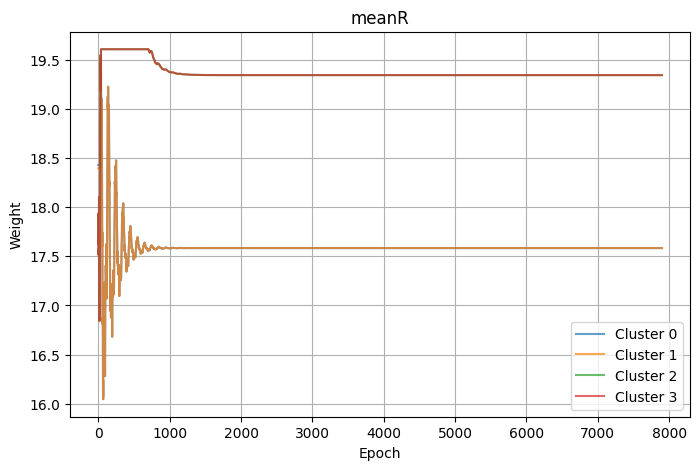

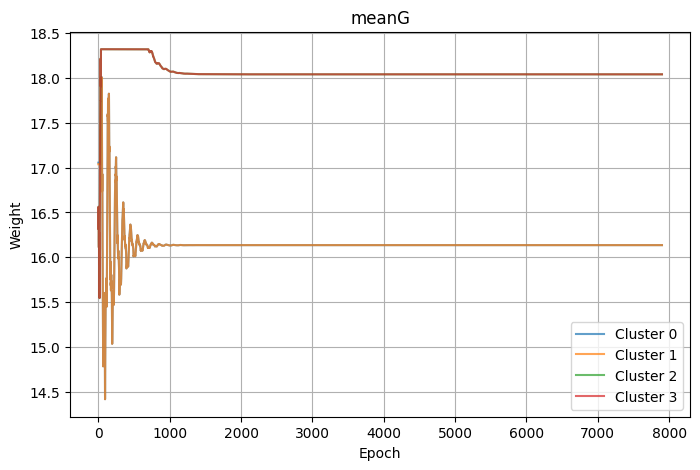

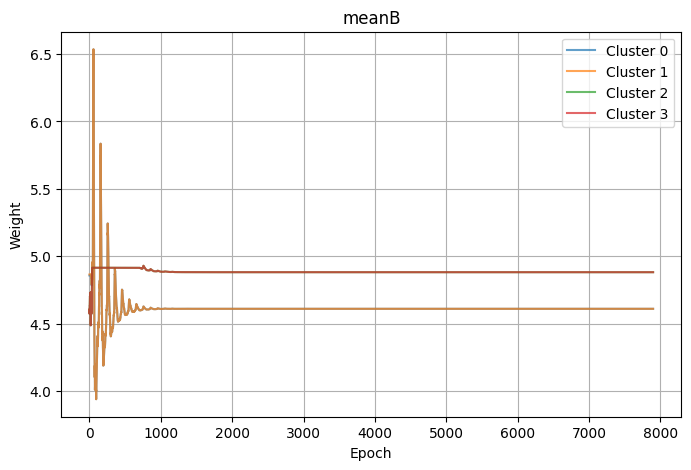

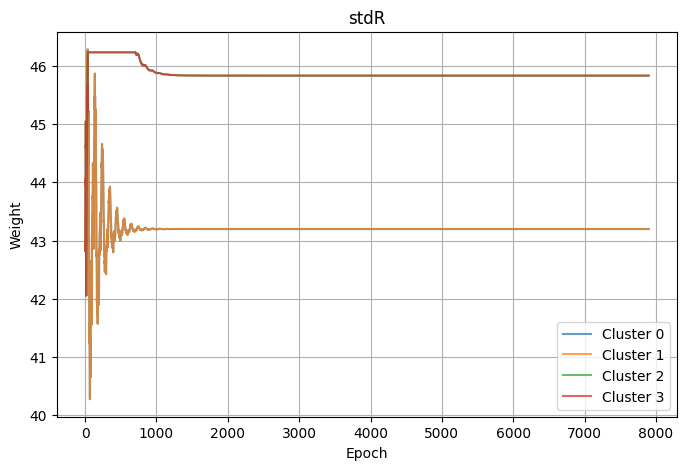

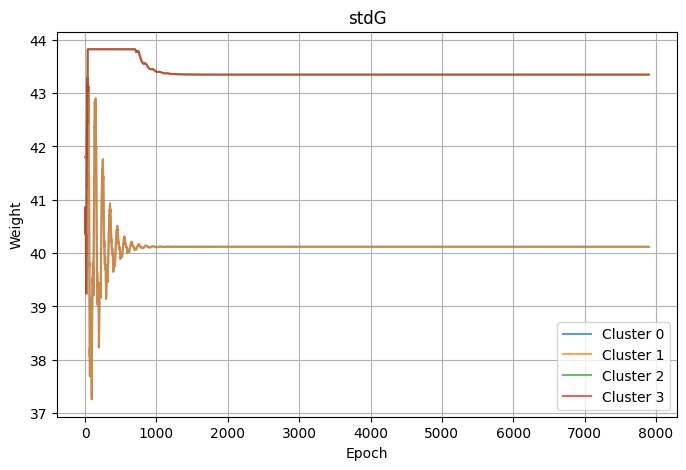

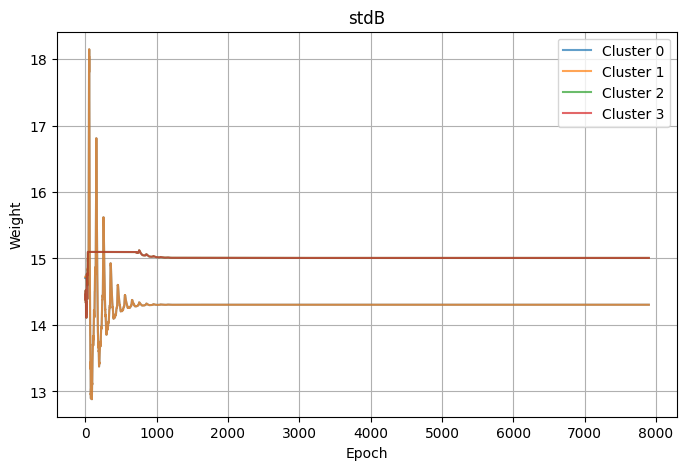

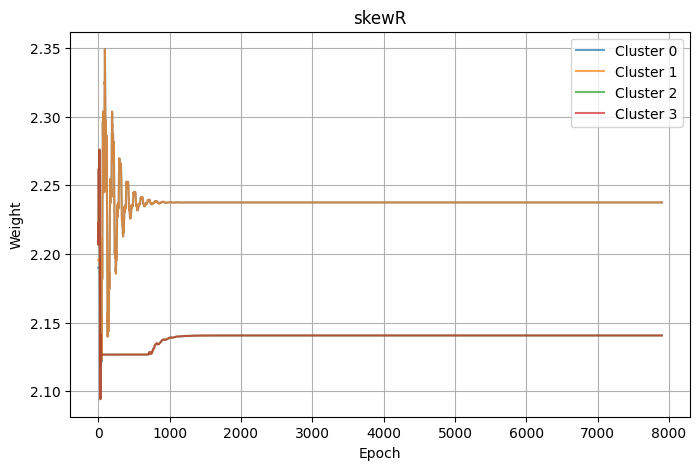

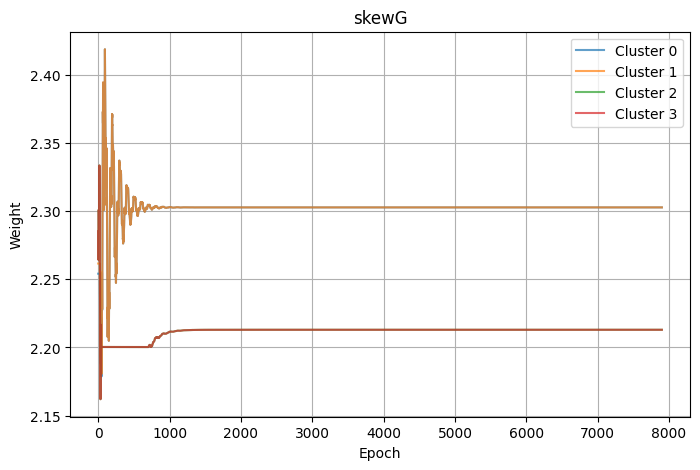

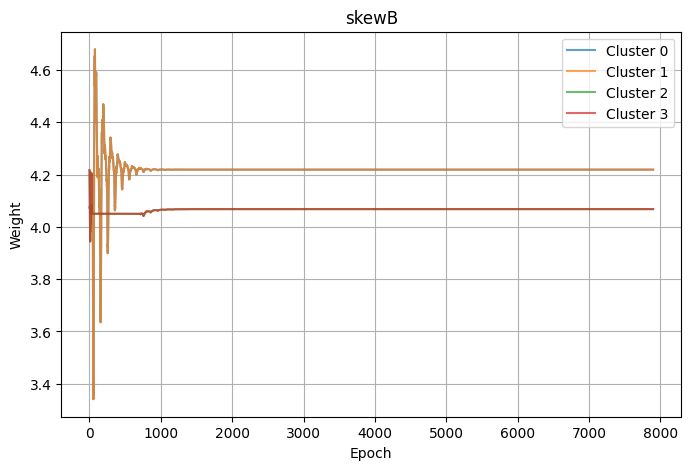

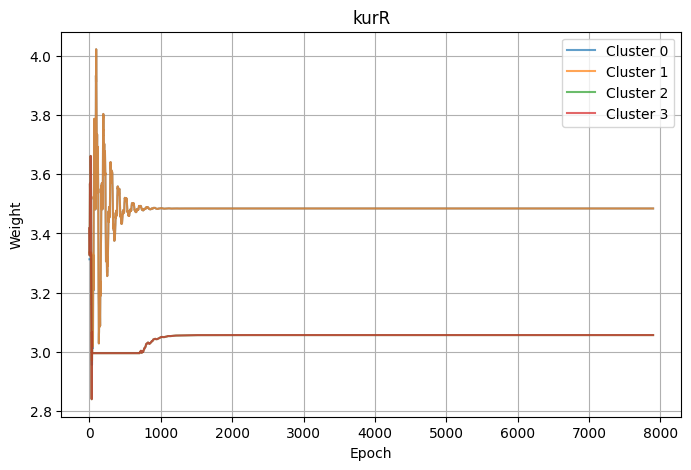

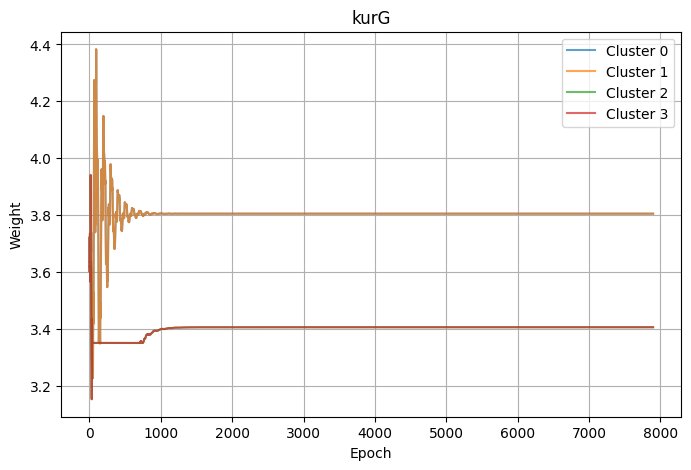

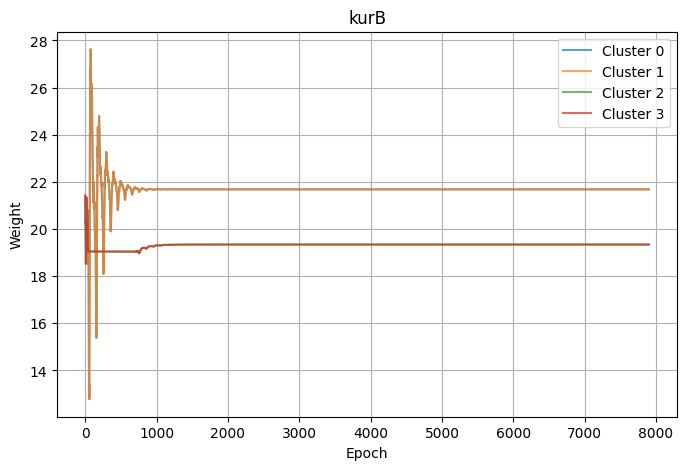

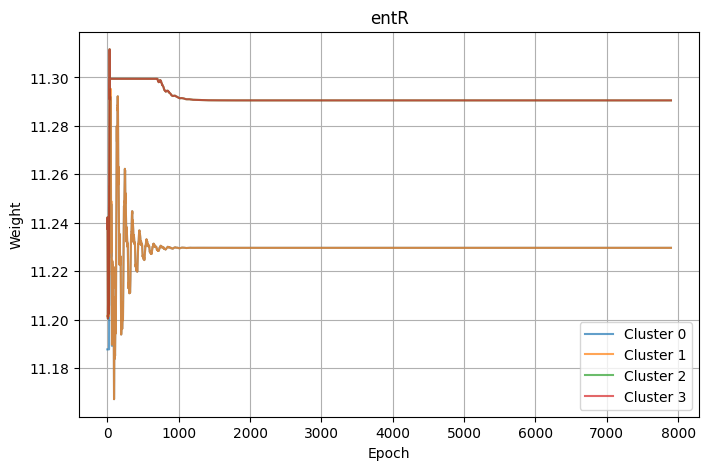

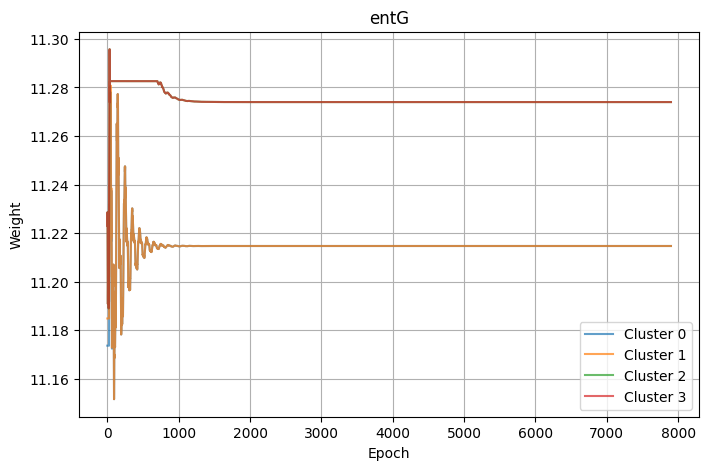

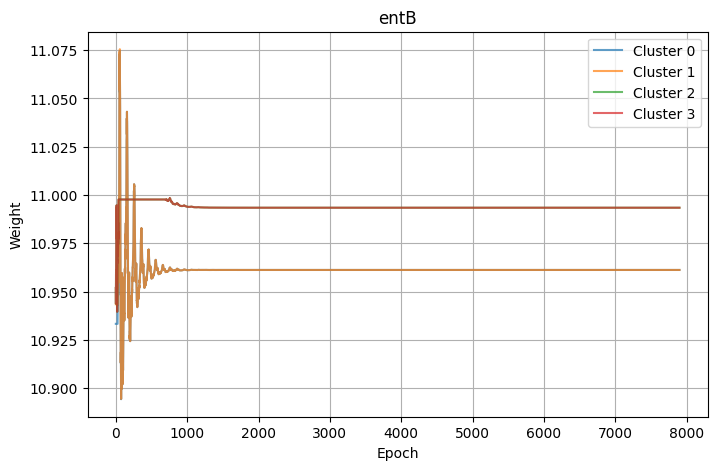

In [24]:
feature = df.columns.tolist()

n_features = w_output.shape[-1]
for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        plt.plot(range(w_output.shape[0]), w_output[:, cluster, col], label=f"Cluster {cluster}", alpha=0.7)
    # Use feature[col] for the title
    plt.title(f"{feature[col]}")
    plt.xlabel("Epoch")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid()
    plt.show()

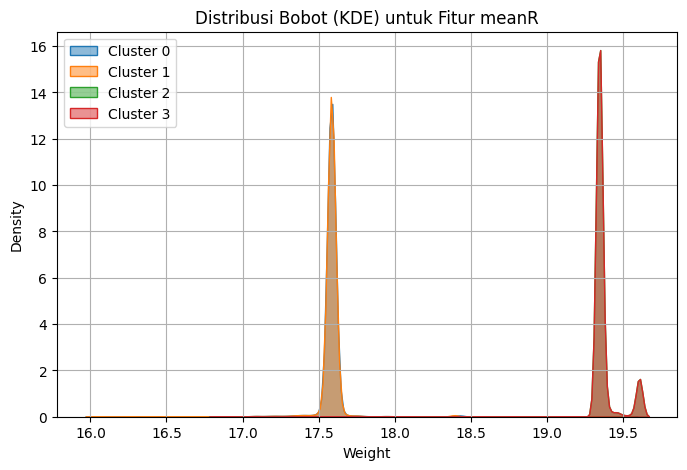

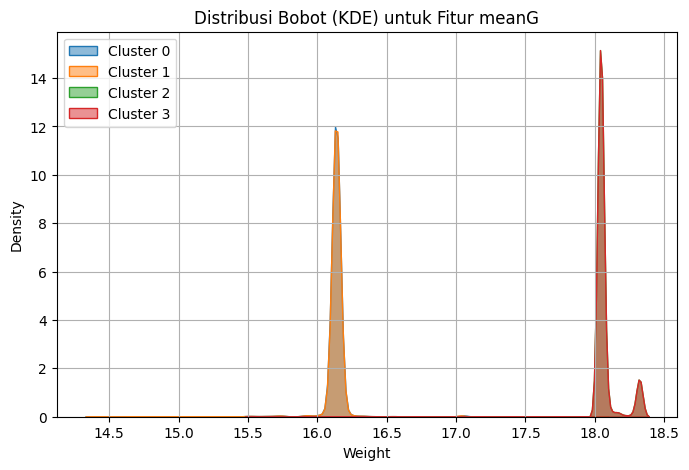

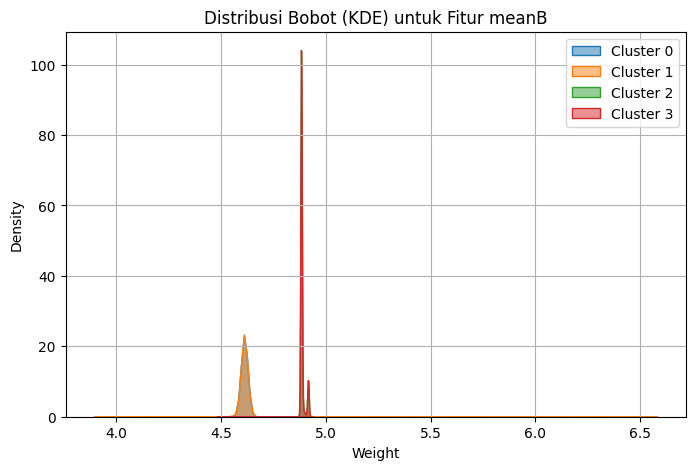

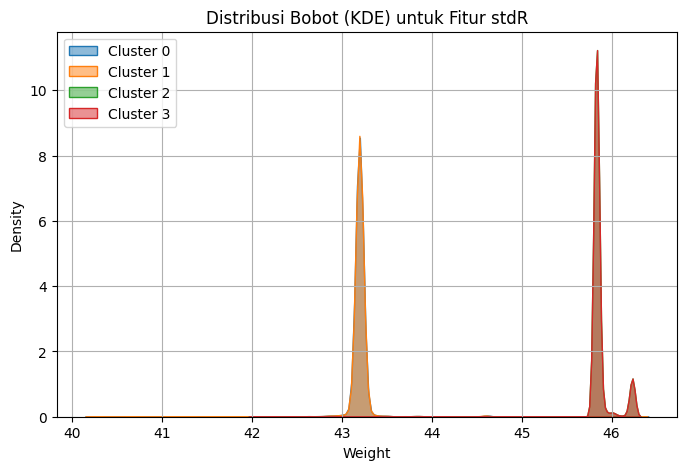

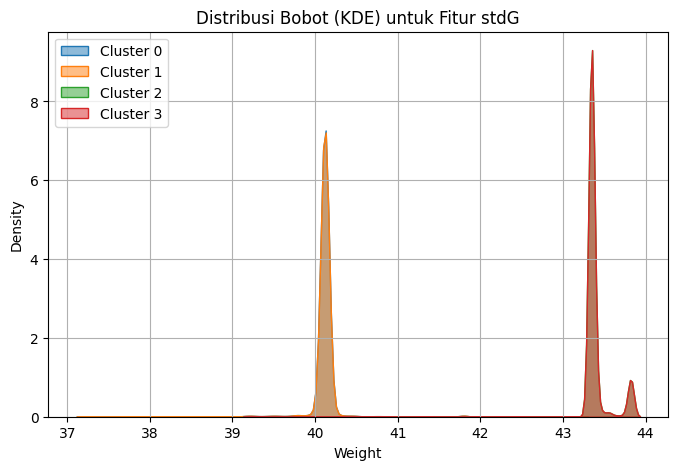

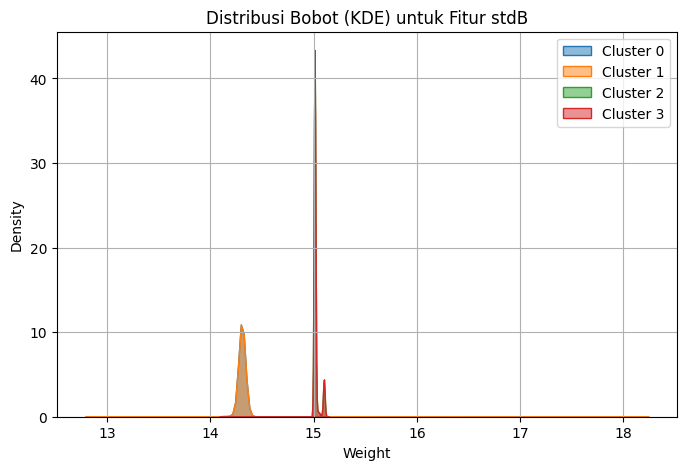

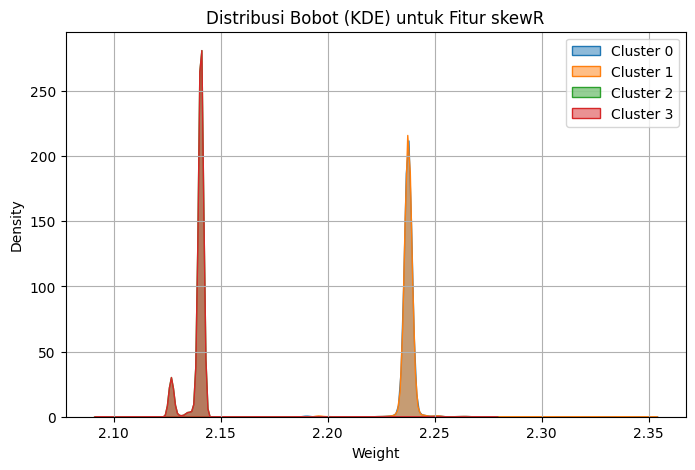

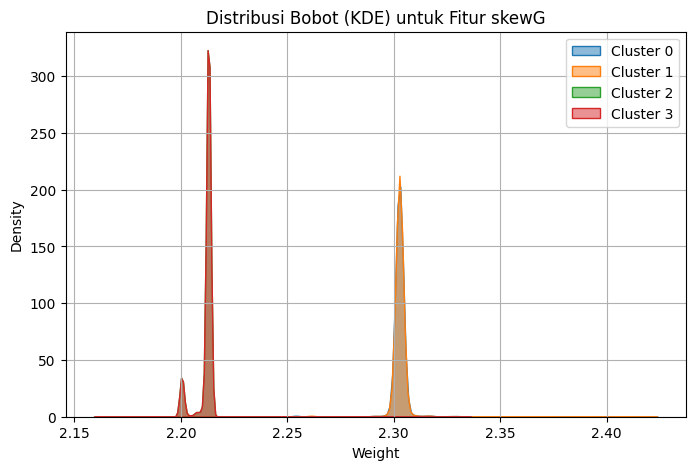

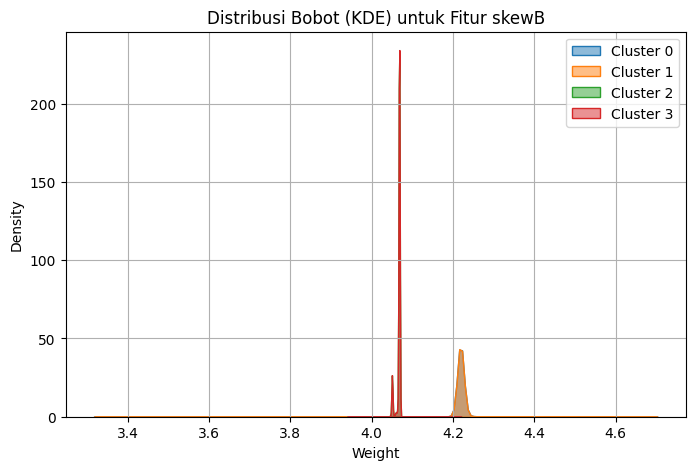

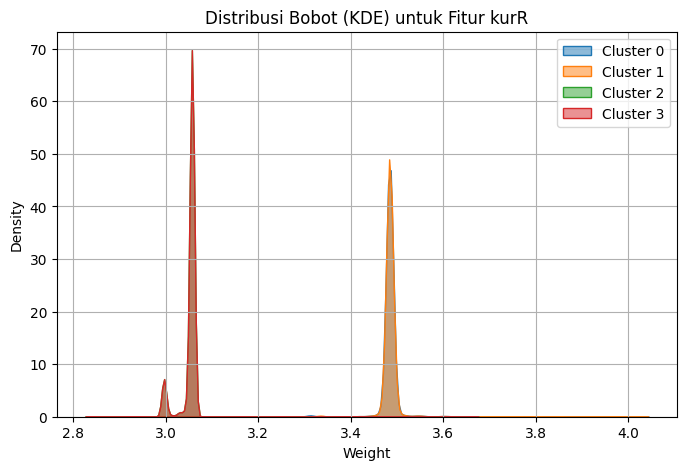

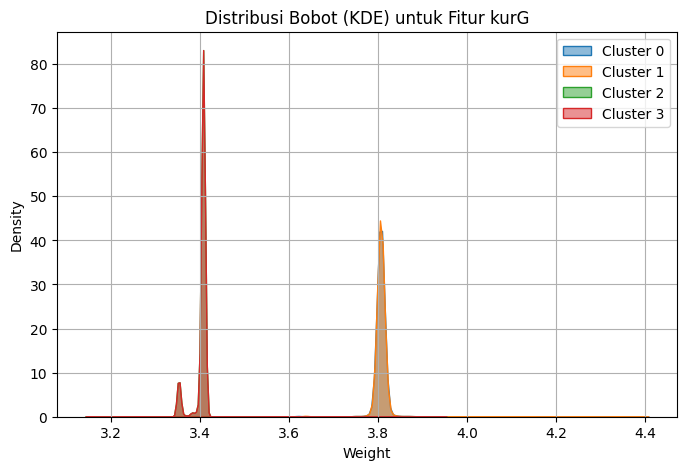

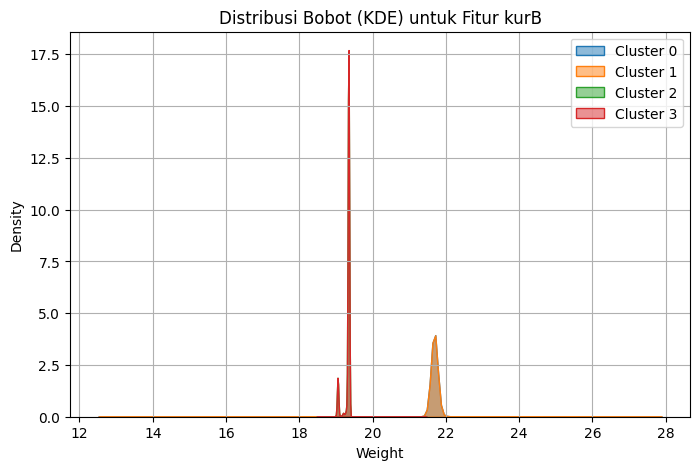

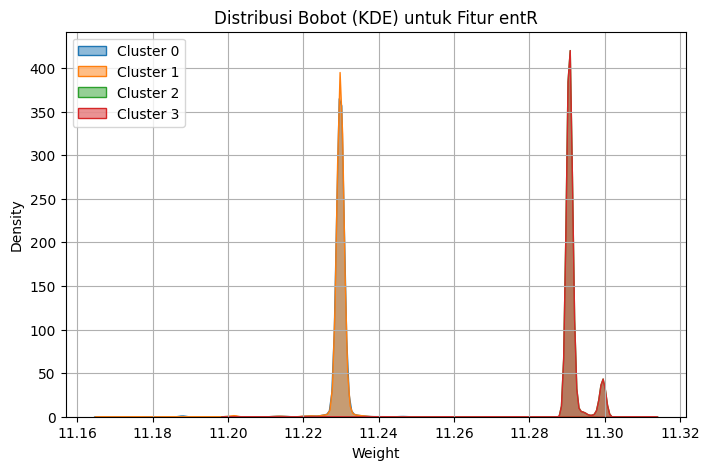

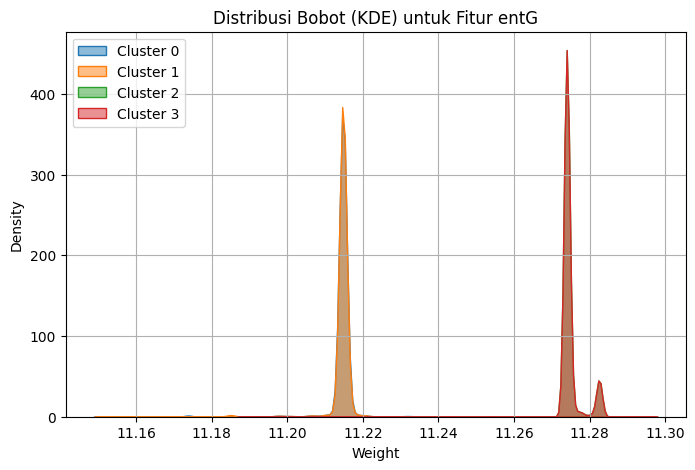

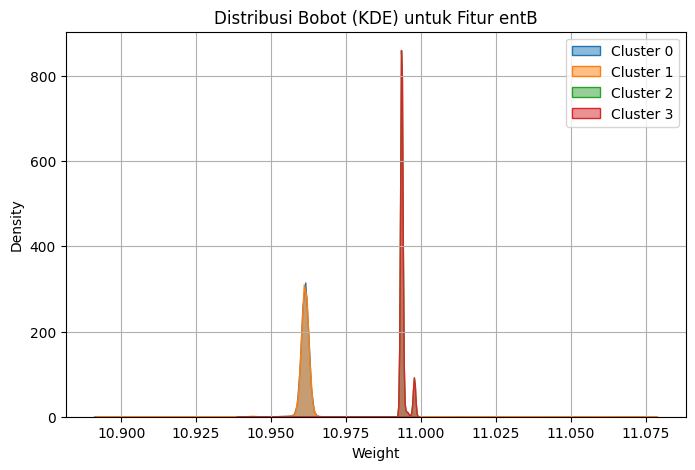

In [ ]:
import matplotlib.pyplot as plt

features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    for cluster in range(w_output.shape[1]):
        weights = w_output[:, cluster, col]
        sns.kdeplot(weights, label=f"Cluster {cluster}", fill=True, alpha=0.5)

    plt.title(f"Distribusi Bobot (KDE) untuk Fitur {features[col]}")
    plt.xlabel("Weight")
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()


C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


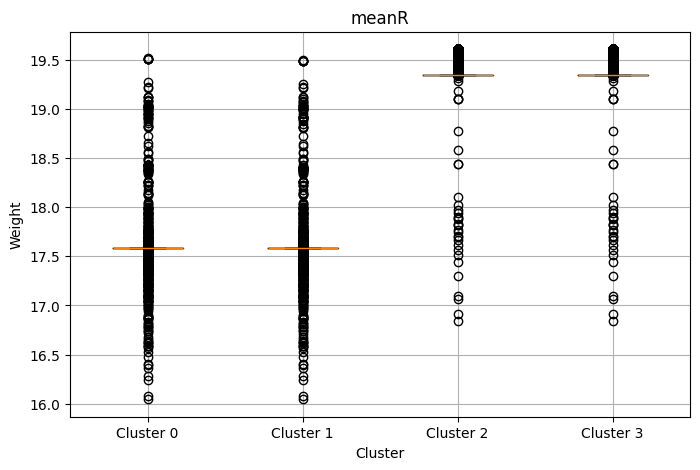

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


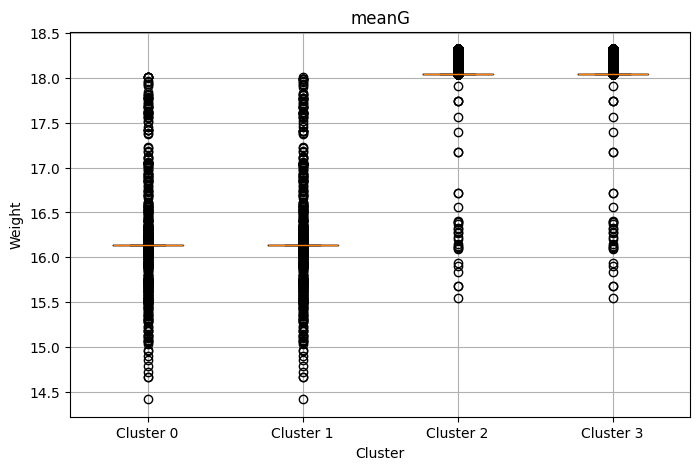

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


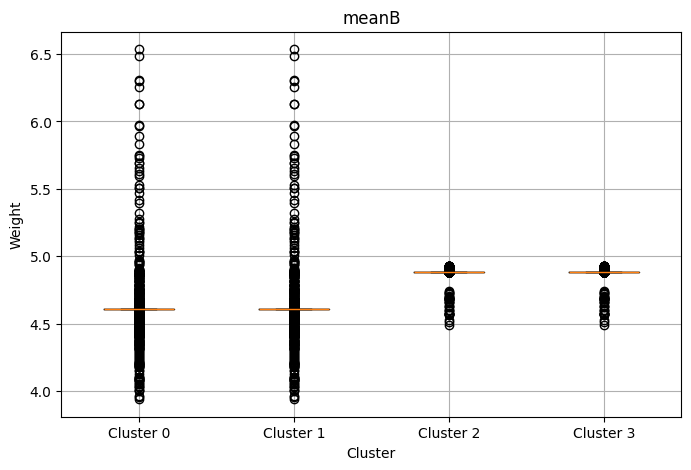

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


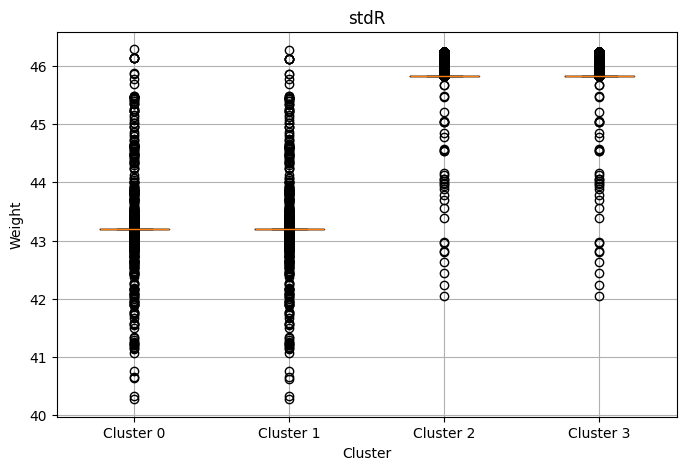

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


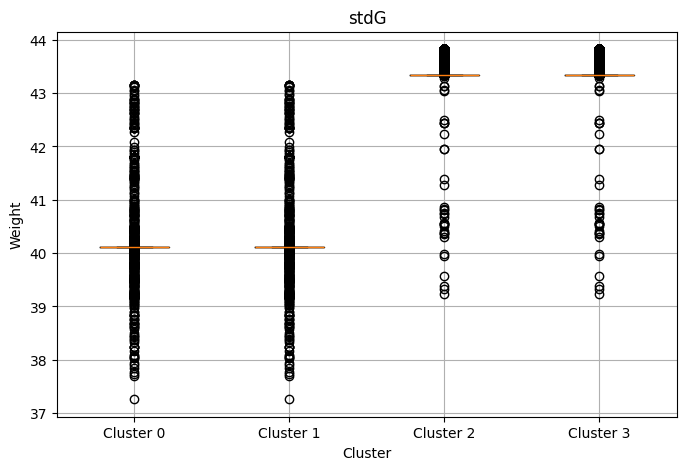

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


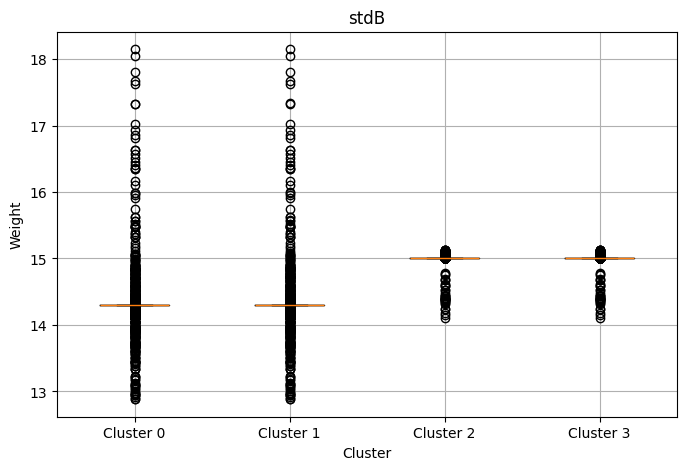

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


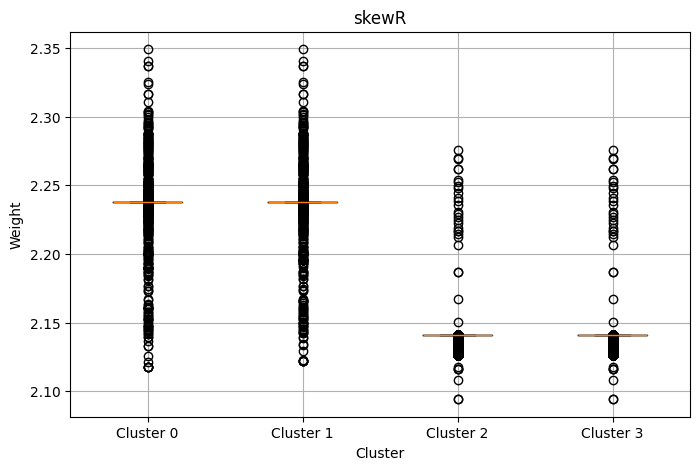

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


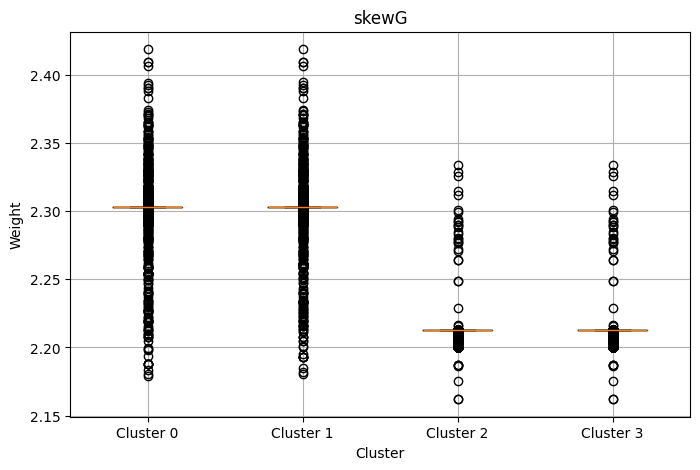

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


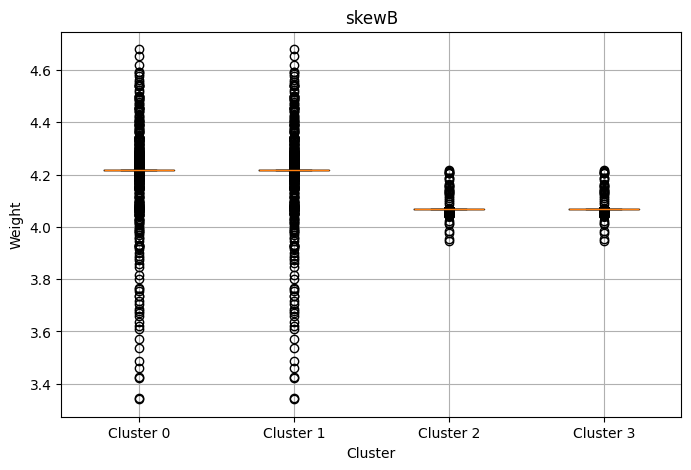

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


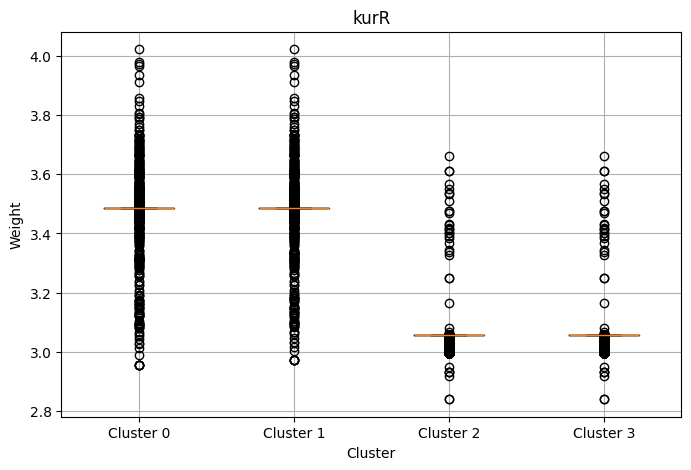

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


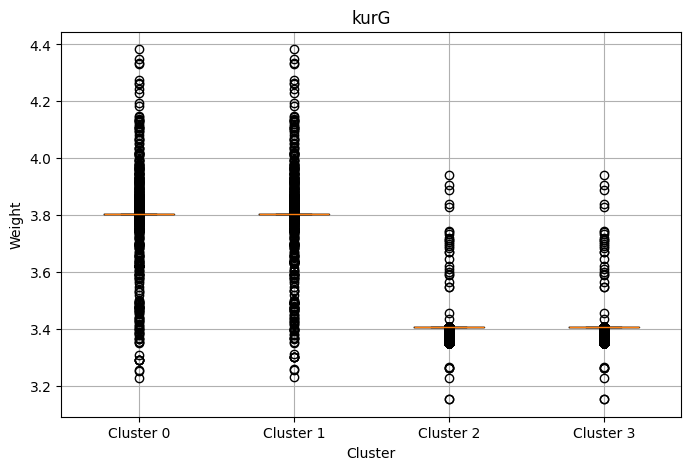

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


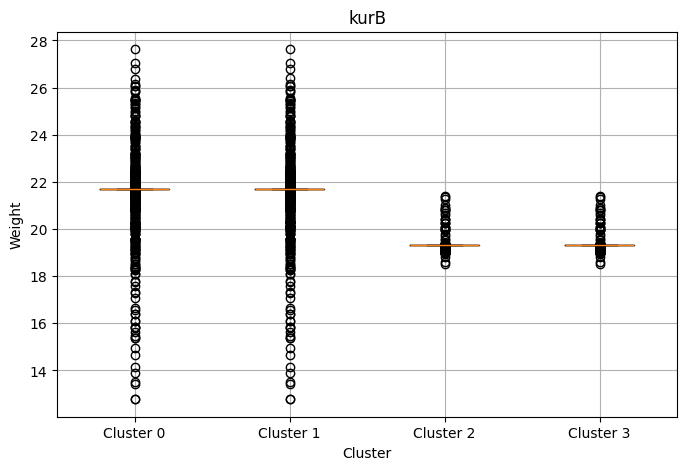

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


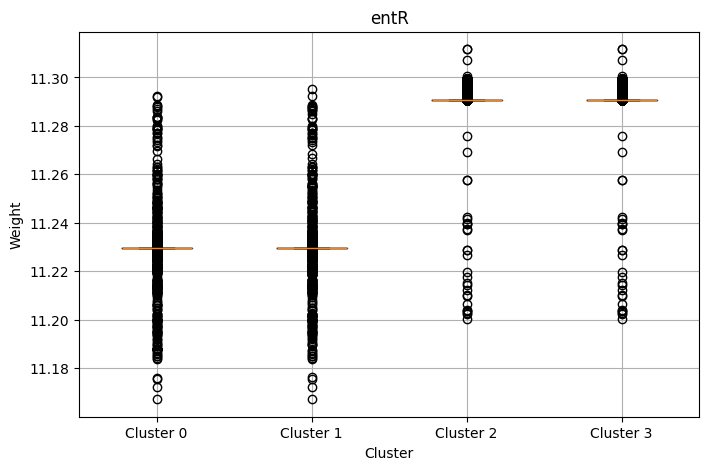

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


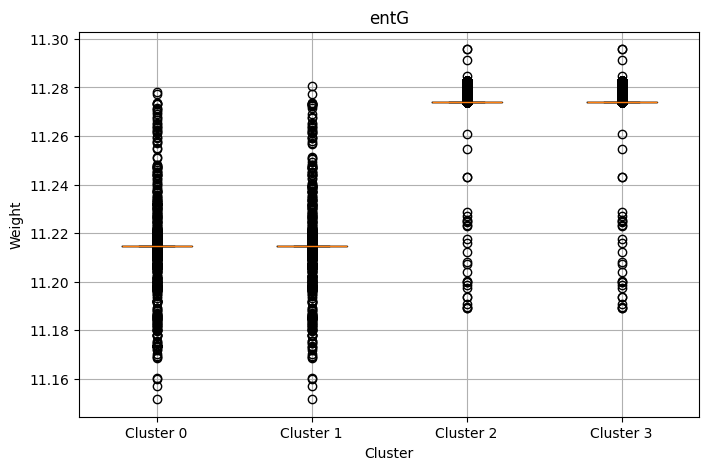

C:\Users\hadik\AppData\Local\Temp\ipykernel_15772\3431390048.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])


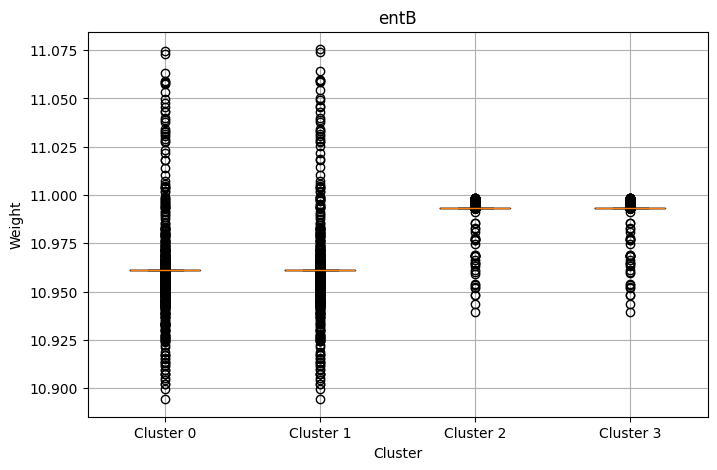

In [ ]:
import matplotlib.pyplot as plt

features = df.columns.tolist()

n_features = w_output.shape[-1]

for col in range(n_features):
    plt.figure(figsize=(8, 5))
    data = [w_output[:, cluster, col] for cluster in range(w_output.shape[1])]
    plt.boxplot(data, labels=[f"Cluster {cluster}" for cluster in range(w_output.shape[1])])

    plt.title(f"{features[col]}")
    plt.xlabel("Cluster")
    plt.ylabel("Weight")
    plt.grid()
    plt.show()


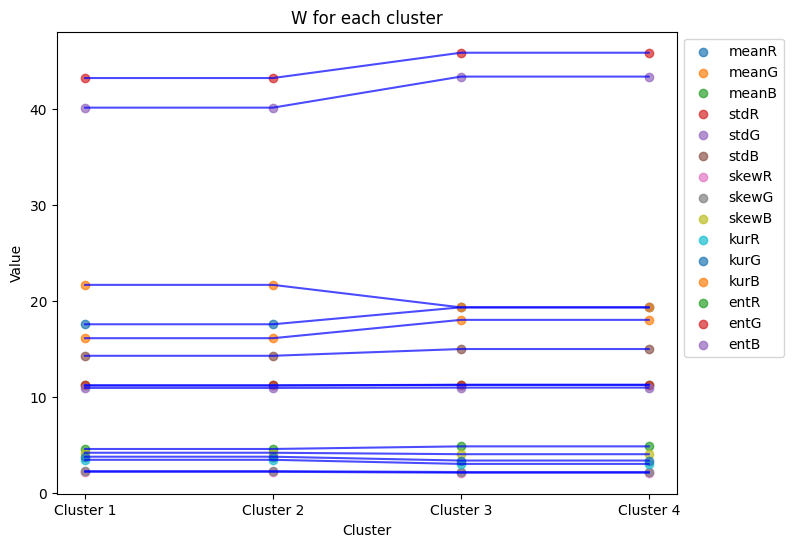

In [ ]:
features = df.columns.tolist()

plt.figure(figsize=(8, 6))
for j, feature in enumerate(features):

    data = [w[i][j] for i in range(len(w))]
    
    plt.scatter(range(len(data)), data, alpha=0.7, label=feature)
    plt.plot(range(len(data)), data, color='b', alpha=0.7, label="_nolegend_")
plt.title(f"W for each cluster")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.xticks(range(len(w)), [f"Cluster {i+1}" for i in range(len(w))])  # Menampilkan cluster 0, 1, 2, 3 pada sumbu x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## D Plot

In [26]:
print(d)

[array(5145.70201973), array(5127.8312882), array(5393.52249669), array(5519.61283626), array(5174.39882461), array(5190.47725183), array(5008.61073904), array(5053.07960038), array(5204.54490323), array(5513.49668641), array(5457.86738386), array(4946.1663613), array(5040.36161292), array(4860.22008748), array(5330.09958376), array(4280.37567536), array(4769.8881004), array(4852.85973085), array(5127.30329324), array(5353.95807655), array(5397.51827921), array(5645.05368195), array(5511.41587951), array(5397.79224665), array(6018.2614892), array(6174.064488), array(5645.93986211), array(5782.65505662), array(5816.41826751), array(5557.94940691), array(5765.48579301), array(6285.83159965), array(6264.62175579), array(5350.72092687), array(5822.27839777), array(5548.74636802), array(6451.9857881), array(5781.28044646), array(5380.65292665), array(5228.96903813), array(5692.10285772), array(5590.95573106), array(5319.02927595), array(5166.7107352), array(5970.90308865), array(5088.449530

In [27]:
d = np.array(d)

[5145.70201973 5127.8312882  5393.52249669 ... 5475.52954298 5371.77622179
 5108.97742371]


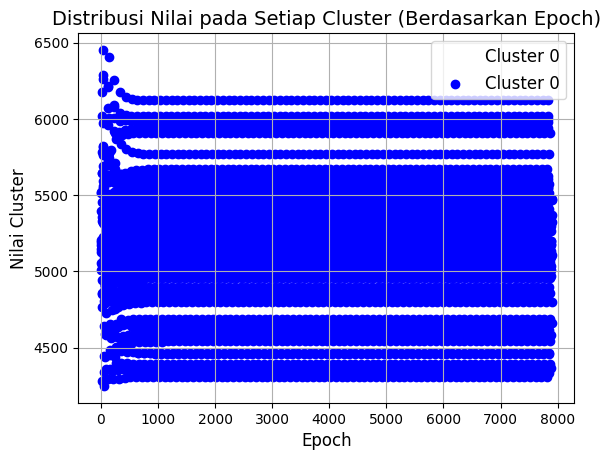

In [34]:


# Plot nilai untuk cluster 0 tanpa garis (marker titik)
plt.plot(d, label='Cluster 0', linestyle='', color='blue')  # Optional line
plt.scatter(range(len(d)), d, label='Cluster 0', s=36, color='blue')  # Dot marker
# Plot nilai untuk cluster 1 tanpa garis (marker kotak)
# Tambahkan detail pada plot
plt.title("Distribusi Nilai pada Setiap Cluster (Berdasarkan Epoch)", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Nilai Cluster", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()